In [1]:
pwd

'C:\\Users\\zahra'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
sns.set(style="whitegrid")

In [4]:
ticker = '^GSPC'
start_date = '2010-01-01'
end_date = '2020-12-31'

data = yf.download(ticker, start=start_date, end=end_date)
data.index = pd.to_datetime(data.index)
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2010-01-04,1132.989990,1133.869995,1116.560059,1116.560059,3991400000
2010-01-05,1136.520020,1136.630005,1129.660034,1132.660034,2491020000
2010-01-06,1137.140015,1139.189941,1133.949951,1135.709961,4972660000
2010-01-07,1141.689941,1142.459961,1131.319946,1136.270020,5270680000
2010-01-08,1144.979980,1145.390015,1136.219971,1140.520020,4389590000


In [5]:
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2768 entries, 2010-01-04 to 2020-12-30
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^GSPC)   2768 non-null   float64
 1   (High, ^GSPC)    2768 non-null   float64
 2   (Low, ^GSPC)     2768 non-null   float64
 3   (Open, ^GSPC)    2768 non-null   float64
 4   (Volume, ^GSPC)  2768 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 129.8 KB
None
Price         Close         High          Low         Open        Volume
Ticker        ^GSPC        ^GSPC        ^GSPC        ^GSPC         ^GSPC
count   2768.000000  2768.000000  2768.000000  2768.000000  2.768000e+03
mean    2076.692679  2086.857052  2064.740615  2076.272282  3.830034e+09
std      674.089735   677.084240   670.953893   674.223824  9.426344e+08
min     1022.580017  1032.949951  1010.909973  1027.650024  1.025000e+09
25%     1413.327515  1418.964996  1405.944977  1413.089966 

In [6]:
data['Daily Return'] = data['Close'].pct_change()
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()
data['Volatility'] = data['Daily Return'].rolling(window=50).std()

# Visualisations

## Closing Price Over Time

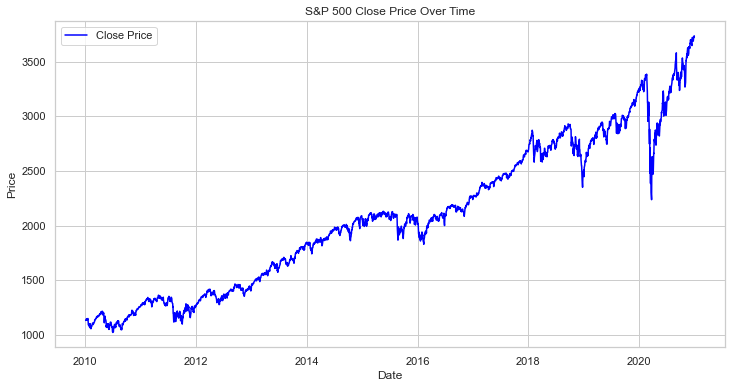

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.title('S&P 500 Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Moving averages

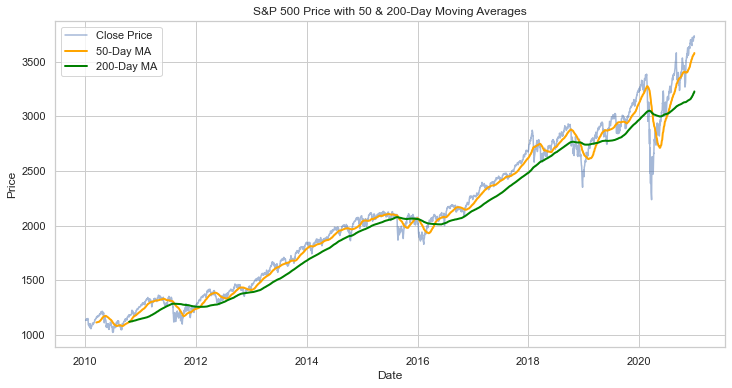

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['MA50'], label='50-Day MA', color='orange', linewidth=2)
plt.plot(data['MA200'], label='200-Day MA', color='green', linewidth=2)
plt.title('S&P 500 Price with 50 & 200-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Daily Returns Distribution

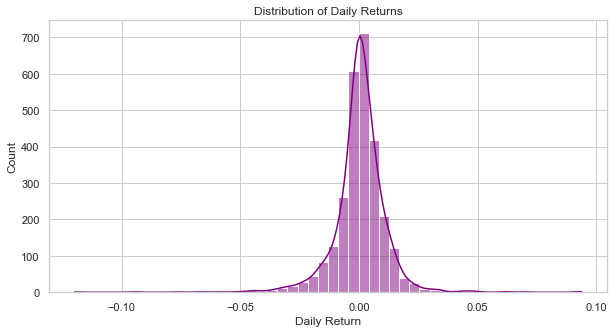

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Daily Return'].dropna(), bins=50, kde=True, color='purple')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.show()

## Rolling Volatility

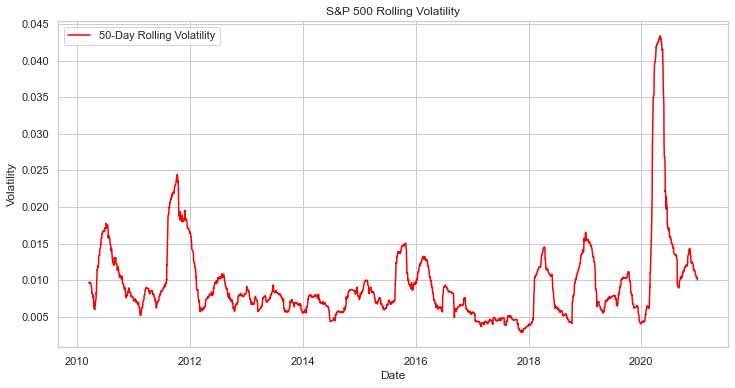

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(data['Volatility'], label='50-Day Rolling Volatility', color='red')
plt.title('S&P 500 Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Advanced analysis

## Seasonal Decomposition

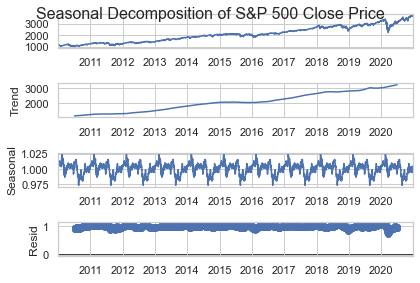

In [11]:
decomposition = seasonal_decompose(data['Close'].dropna(), model='multiplicative', period=252)
decomposition.plot()
plt.suptitle('Seasonal Decomposition of S&P 500 Close Price', fontsize=16)
plt.show()

# Summary of Findings

- The S&P 500 trended upwards from 2010 to 2020, with occasional market drops.
- The 50-day and 200-day moving averages show long-term trends and corrections.
- Daily returns are mostly normal but have occasional spikes.
- Volatility increased in certain periods, likely due to economic events.
- Seasonal decomposition shows yearly patterns, hinting at cyclical trends.